**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Andrea Sánchez Martínez
*   MATRÍCULA: A01795414


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
import pandas as pd

air_df = pd.read_csv("LaqnData.csv") #Descarga de archivo

In [2]:
air_df.shape

(43800, 6)

In [3]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [4]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [5]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [6]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [7]:
#Calcula el porcentaje de valores faltantes por columna.

air_df.isna().sum() / len(air_df) * 100

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron? **8760**
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron? **5**
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
    **Las columnas Site y Provisional or Ratified no posen ningun valor informativo porque es el mismo valor en todo el conjunto de datos** 
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [8]:
# Calcula el numero de valures unicos por columa del Dataframe
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

In [9]:
# Con base a lo anterior podemos responder que:
# 1. Con la columna ReadingDateTime podemos saber que se hicieron 8760 mediciones
# 2. Con la columna Species podemos saber que se analizaron 5 contaminantes del aire
# 3. Las columnas Site y Provisional or Ratified no posen ningun valor informativo porque es el mismo 
# valor en todo el conjunto de datos

In [10]:
air_df.drop( columns= ["Site", "Provisional or Ratified"], inplace= True) #Eliminamos las columnas Site y 
# Provisional or Ratified  
air_df

,Species,ReadingDateTime,Value,Units
0,NO,01/01/2017 00:00,3.5,ug m-3
1,NO,01/01/2017 01:00,3.6,ug m-3
2,NO,01/01/2017 02:00,2.2,ug m-3
3,NO,01/01/2017 03:00,2.1,ug m-3
4,NO,01/01/2017 04:00,3.3,ug m-3
...,...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0,ug m-3
43796,PM2.5,31/12/2017 20:00,6.0,ug m-3
43797,PM2.5,31/12/2017 21:00,5.0,ug m-3
43798,PM2.5,31/12/2017 22:00,5.0,ug m-3


In [11]:
air_df["Units"].unique() #Verificamos que la columna Units no proporciona valor informatico

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [12]:
air_df.drop("Units", axis = 1, inplace= True) #Eliminamos la columna Units
air_df

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [13]:
air_df["Species"].value_counts()

PM2.5    8760
NO       8760
NO2      8760
PM10     8760
NOX      8760
Name: Species, dtype: int64

In [14]:
air_df["ReadingDateTime"].nunique() # Se verifica que las lecturas conincide con el total de mediciones

8760

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [15]:
air_df.groupby("Species").mean(numeric_only=True)

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [16]:
pvt_df = air_df.pivot(columns=["Species"], values='Value', index="ReadingDateTime")
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? **120.2** ¿A qué día pertenece? **24/01/2017 19:00**
*   ¿Cuál es el menor valor de `PM10` registrado? **- 5.6** ¿A qué día pertenece? **12/09/2017 23:00**
*   ¿Cuál es la mediana del `NO`? **7.1** ¿Cómo se interpreta? **El 50% de los datos tienen un promedio de 7 en valor de registro**
*   ¿Cuál es el primer cuartil de `PM2.5`? **7.0**¿Qué significa?**Que el primer 25% de los datos tienen en promedio 7 en valor registrado**

In [17]:
air_df.groupby("Species").describe().T 

Species               NO          NO2          NOX         PM10        PM2.5
Value count  8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
      mean     15.045115    38.010185    61.078661    22.551704    14.999831
      std      26.678565    18.580841    54.584805    15.344755    13.558588
      min      -2.000000     2.800000     1.000000    -5.600000    -8.000000
      25%       3.100000    23.800000    30.300000    13.900000     7.000000
      50%       7.100000    35.300000    46.900000    19.500000    11.000000
      75%      15.500000    49.900000    73.800000    27.300000    18.000000
      max     401.799990   120.200000   734.299990   633.099980   128.000000

In [18]:
#Calcula el mayor NO2 registrado y su fecha de medicion
air_df.loc[air_df[air_df["Species"] == "NO2"]["Value"].idxmax()]

Species                         NO2
ReadingDateTime    24/01/2017 19:00
Value                         120.2
Name: 9331, dtype: object

In [19]:
#Calcula el mayor PM10 registrado y su fecha de medicion
air_df.loc[air_df[air_df["Species"] == "PM10"]["Value"].idxmin()]

Species                        PM10
ReadingDateTime    12/09/2017 23:00
Value                          -5.6
Name: 32399, dtype: object

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad? **NOX, también lo confirma su alta desviacion estandar**

<AxesSubplot:ylabel='Frequency'>

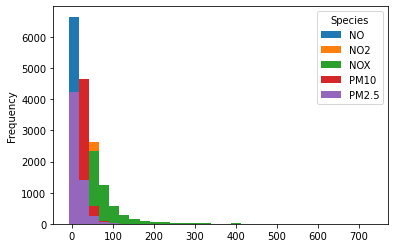

In [20]:
pvt_df.plot(kind="hist", bins = 30)

array([[<AxesSubplot:title={'center':'NO'}>,
        <AxesSubplot:title={'center':'NO2'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'PM10'}>],
       [<AxesSubplot:title={'center':'PM2.5'}>, <AxesSubplot:>]],
      dtype=object)

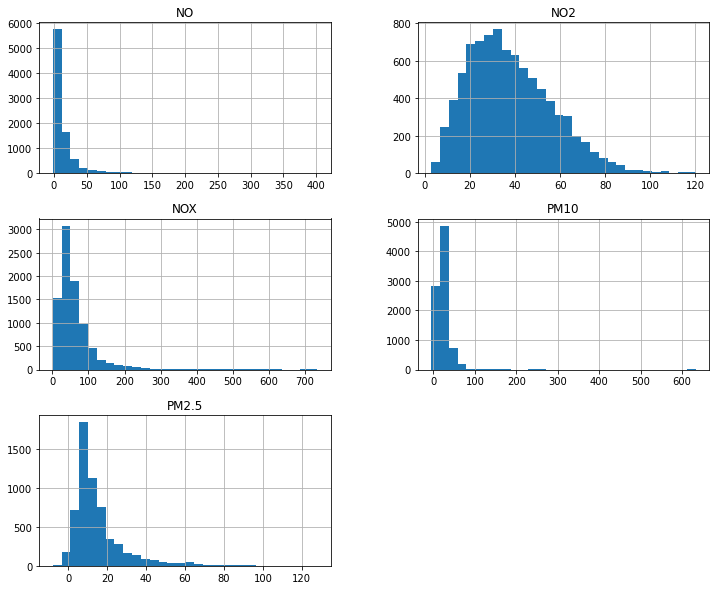

In [21]:
pvt_df.hist(figsize=(12,10), bins= 30)

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [22]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) # Crea un nuevo dataframe con base en
# dividir el texto de la columna ReadingDateTime basado en el caracter " ", es decir, 
# wepara el valor de fecha y hora en diferentes columnas
datetime_df.columns = ['Date','Time'] #Nombra las columas del nuevo dateframe
datetime_df #Imprime el nuevo dataframe con las columnas Date y Tiempo

date_df = datetime_df.Date.str.split('/',expand=True) #Crea un nuevo dataframe con base en dividir 
# el texto de la columna Date basado en el caracter "/", es decir, separa el valor de fecha por año,
# mes y día en diferentes columnas
date_df.columns = ['Day','Month','Year'] #nombras las columnas del nuevo dataframe
date_df #Imprime el nuevo dataframe con las columnas Day, Month y Year

air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year']) #Primero 
# une la tabla de air_df con date_df.
# Al resultado de la union anteior le agrega la union con la columna Time del dataframe datetime_df
#Por ultimo se desace de las columas ReadingDateTime y Year
air_df = air_df.set_index(['Month','Day','Time','Species']) #Reinicia el indice a las columnas Month, Day, Time, Species
air_df #Imprime el nuevo dataframe con las columnas indices Month, Day, Time, Species y columna valores Value

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales? **No, con Unstack obtenemos los valores del index Species en formato ancho por cada contaminante por columna**

In [23]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()`/`unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()`/`unstack()`, ¿cuál elegirías? ¿Por qué?

**Ambas funciones `melt()` y `pivot()` te apoyan en reestructurar tablas de datos. La funcion `melt()` te ayuda a transformar un dataframe de la forma ancha a la forma larga, es decir, toma columnas y las convierte filas. Por otro lado, la funcion `pivot()` hace lo contrario, tranforma un dataframe de la forma larga a la forma ancha, es decir, toma filas y las convierte en columnas.**

**El par `stack()` y `unstack()` te apoyan para transformar la estructura de datos en dataframes que presentan MultiIndex (indices jerarquicos) en columnas. Con la funcion `stack()` logramos apilar columnas a nivel exterior desde el MultiIndex, mientras que, en caso contrario, con `unstack()` desempila el nivel exterior del MultiIndex y la convierte en columna del data frame.**

**La contraparte de `melt()` sería `unstack()` porque con melt() logramos transformar un dataframe de forma ancha a forma larga, mientras que con `unstack()` hariamos los contrario, transformar un dataframe de forma larga a forma ancha.**
